In [1]:
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import cv2

from detectron2.data import build_detection_train_loader, DatasetMapper, get_detection_dataset_dicts
from detectron2.config import get_cfg

from codes.utils.register_datasets import register_mosquitoes
from codes.lossEvalHooker import build_train_aug, CustomDatasetMapper

from codes.utils.img_utils import add_bboxes_on_image


In [3]:
register_mosquitoes()

dataset = "mbg_train0_tire"

config_file = '../codes/configs/mosquitoes/faster_rcnn_R_50_FPN_1x.yaml'
cfg = get_cfg()
cfg.merge_from_file(config_file)

dataset_dicts = get_detection_dataset_dicts([dataset], filter_empty=True)


dataloader = build_detection_train_loader(dataset_dicts,\
                                          mapper=CustomDatasetMapper(augmentations=build_train_aug(cfg), is_train=True, image_format="BGR"),\
                                          total_batch_size=4)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [4]:
dataloader = iter(dataloader)

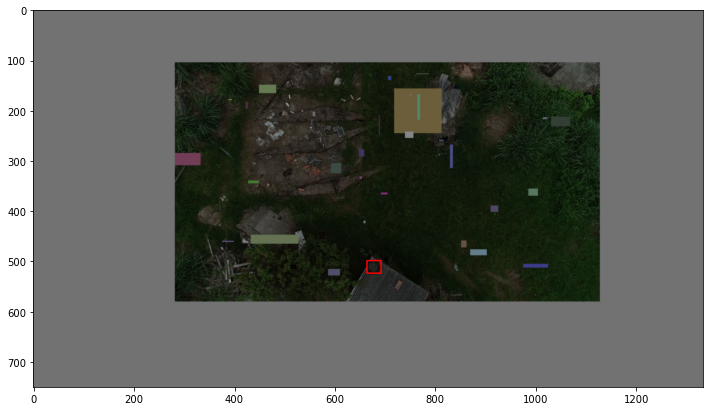

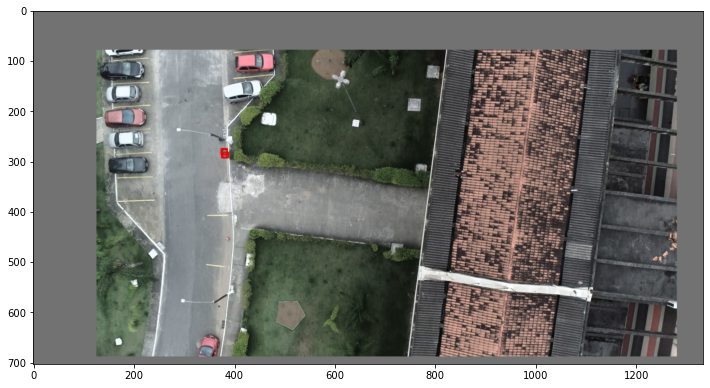

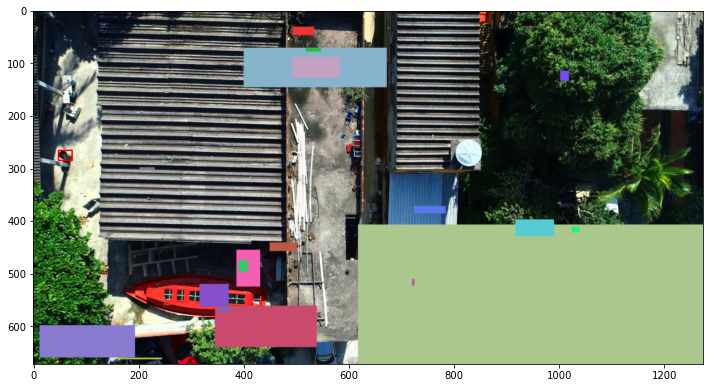

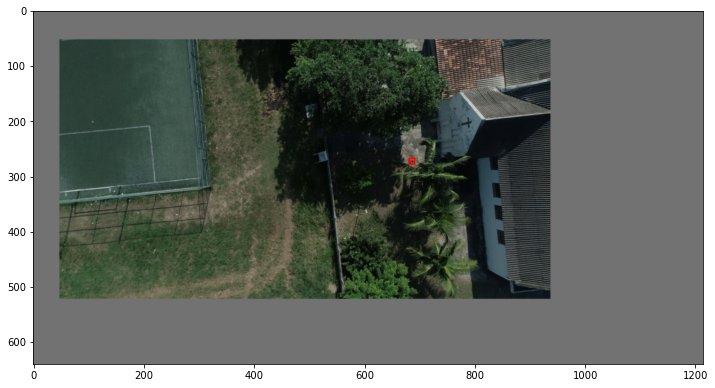

In [5]:
batch = next(dataloader)
for n, sample in enumerate(batch):
    plt.figure(figsize=(12,8))
    tensor_image = sample['image']
    boxes = sample['instances'].get('gt_boxes')
    
    img = tensor_image.permute(1, 2, 0).numpy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = add_bboxes_on_image(img, boxes, color=(0,0,255), thickness=2)
    
    plt.imshow(img)
    
    plt.show()
